<a href="https://colab.research.google.com/github/pankajroy97/CIP-Data-Science-Internship/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sex: 1 for female and 2 for male.

age: of the patient.

classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.

pneumonia: whether the patient already have air sacs inflammation or not.

pregnancy: whether the patient is pregnant or not.

diabetes: whether the patient has diabetes or not.

copd: Indicates whether the patient has Chronic obstructive pulmonary(heart) disease or not.

asthma: whether the patient has asthma or not.

inmsupr: whether the patient is immunosuppressed or not.

hypertension: whether the patient has hypertension(high blood pressure) or not.

cardiovascular: whether the patient has heart or blood vessels related disease.

renal chronic: whether the patient has chronic renal disease or not.

other disease: whether the patient has other disease or not.

obesity: whether the patient is obese or not.

tobacco: whether the patient is a tobacco user.

usmr: Indicates whether the patient treated medical units of the first, second or third level.

medical unit: type of institution of the National Health System that provided the care.

intubed: whether the patient was connected to the ventilator.

icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [444]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns
import numpy as np
# Numpy is aliased as np

import warnings
warnings.filterwarnings("ignore")

In [445]:
#Display Top 5 Row in Dataset
df=pd.read_csv('/content/Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


###Lets check some statistic inside dataset 

In [446]:
df.shape

(1048575, 21)

In [447]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [449]:
df.duplicated().sum()

812049

In [450]:
df.drop_duplicates(inplace=True)

In [451]:
df.shape

(236526, 21)

In [452]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [453]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000,236526.000000
mean,1.512337,7.634230,1.547521,1.577712,44.238401,4.525765,52.620274,54.794826,2.840855,2.966976,2.949325,3.135630,2.691319,3.687645,2.980767,2.768863,2.954956,2.973352,4.781263,44.371008
std,0.499849,3.661318,0.497738,0.493925,47.394072,16.731469,19.318869,47.225449,10.500621,9.882551,9.839247,10.619391,10.098528,12.930442,10.026841,9.959472,9.888310,10.289529,1.897253,47.337447
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,40.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000
50%,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,54.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000
75%,2.000000,12.000000,2.000000,2.000000,97.000000,2.000000,67.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,97.000000
max,2.000000,13.000000,2.000000,2.000000,99.000000,99.000000,121.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,7.000000,99.000000


In [454]:
#In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.
df.replace(99,np.nan,inplace=True)
df.replace(98,np.nan,inplace=True)
df.replace(97,np.nan,inplace=True)

### Remove Null values in this dataset 

In [455]:
df.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 105387
PNEUMONIA                 7187
AGE                        308
PREGNANT                131457
DIABETES                  2840
COPD                      2529
ASTHMA                    2506
INMSUPR                   2926
HIPERTENSION              2620
OTHER_DISEASE             4362
CARDIOVASCULAR            2603
OBESITY                   2554
RENAL_CHRONIC             2531
TOBACCO                   2738
CLASIFFICATION_FINAL         0
ICU                     105536
dtype: int64

In [456]:
#Drop some columns which have 40-45% null values occurs.
df.drop(['INTUBED','PREGNANT','ICU','PNEUMONIA'],axis=1,inplace=True)

In [457]:
df.isnull().sum()

USMER                      0
MEDICAL_UNIT               0
SEX                        0
PATIENT_TYPE               0
DATE_DIED                  0
AGE                      308
DIABETES                2840
COPD                    2529
ASTHMA                  2506
INMSUPR                 2926
HIPERTENSION            2620
OTHER_DISEASE           4362
CARDIOVASCULAR          2603
OBESITY                 2554
RENAL_CHRONIC           2531
TOBACCO                 2738
CLASIFFICATION_FINAL       0
dtype: int64

In [458]:
df.dropna(axis=0,how='any',inplace=True)

In [459]:
df.shape

(229399, 17)

In [460]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
dtype: int64

In [461]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'AGE',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL'],
      dtype='object')

In [462]:
print("USMER=",df['USMER'].unique())
print("MEDICAL_UNIT",df['MEDICAL_UNIT'].unique())
print("SEX=",df['SEX'].unique())
print("PATIENT_TYPE=",df['PATIENT_TYPE'].unique())
print("CLASIFFICATION_FINAL=",df['CLASIFFICATION_FINAL'].unique())
print("TOBACCO=",df['TOBACCO'].unique())
print("DIABETES=",df['DIABETES'].unique())
print("COPD=",df['COPD'].unique())
print("ASTHMA=",df['ASTHMA'].unique())
print("INMSUPR=",df['INMSUPR'].unique())
print("HIPERTENSION=",df['HIPERTENSION'].unique())
print("OTHER_DISEASE=",df['OTHER_DISEASE'].unique())
print("OBESITY=",df['OBESITY'].unique())
print("RENAL_CHRONIC=",df['RENAL_CHRONIC'].unique())

USMER= [2 1]
MEDICAL_UNIT [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
SEX= [1 2]
PATIENT_TYPE= [1 2]
CLASIFFICATION_FINAL= [3 5 7 6 1 2 4]
TOBACCO= [2. 1.]
DIABETES= [2. 1.]
COPD= [2. 1.]
ASTHMA= [2. 1.]
INMSUPR= [2. 1.]
HIPERTENSION= [1. 2.]
OTHER_DISEASE= [2. 1.]
OBESITY= [2. 1.]
RENAL_CHRONIC= [2. 1.]


In [463]:
df['SEX']=df['SEX'].replace({1:"female",2:"male"})
df['PATIENT_TYPE']=df['PATIENT_TYPE'].replace({1:"Return Home",2:"Hospitalization"})

In [464]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,female,Return Home,03/05/2020,65.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3
1,2,1,male,Return Home,03/06/2020,72.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5
2,2,1,male,Hospitalization,09/06/2020,55.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3
3,2,1,female,Return Home,12/06/2020,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7
4,2,1,male,Return Home,21/06/2020,68.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3


In [465]:
df['Patient_Condition']=df['DATE_DIED']
df['Patient_Condition'][df['DATE_DIED']=='9999-99-99']='Alive'
df['Patient_Condition'][df['DATE_DIED']!='9999-99-99']='Dead'

In [466]:
df[df['Patient_Condition']=='Dead']

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Patient_Condition
0,2,1,female,Return Home,03/05/2020,65.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,Dead
1,2,1,male,Return Home,03/06/2020,72.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,Dead
2,2,1,male,Hospitalization,09/06/2020,55.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,Dead
3,2,1,female,Return Home,12/06/2020,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,Dead
4,2,1,male,Return Home,21/06/2020,68.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,1,13,male,Hospitalization,18/07/2020,73.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,Dead
1047636,1,13,male,Return Home,26/07/2020,82.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,Dead
1047637,1,13,female,Return Home,27/07/2020,82.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,Dead
1047638,1,13,male,Hospitalization,29/07/2020,80.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3,Dead


In [467]:
df_sample=df[['DATE_DIED','Patient_Condition']]

In [468]:
df_sample.head()

,DATE_DIED,Patient_Condition
0,03/05/2020,Dead
1,03/06/2020,Dead
2,09/06/2020,Dead
3,12/06/2020,Dead
4,21/06/2020,Dead


In [469]:
df.drop('DATE_DIED',axis=1,inplace=True)

In [470]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,Patient_Condition
0,2,1,female,Return Home,65.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,Dead
1,2,1,male,Return Home,72.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,Dead
2,2,1,male,Hospitalization,55.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,Dead
3,2,1,female,Return Home,53.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,Dead
4,2,1,male,Return Home,68.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,Dead


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229399 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 229399 non-null  int64  
 1   MEDICAL_UNIT          229399 non-null  int64  
 2   SEX                   229399 non-null  object 
 3   PATIENT_TYPE          229399 non-null  object 
 4   AGE                   229399 non-null  float64
 5   DIABETES              229399 non-null  float64
 6   COPD                  229399 non-null  float64
 7   ASTHMA                229399 non-null  float64
 8   INMSUPR               229399 non-null  float64
 9   HIPERTENSION          229399 non-null  float64
 10  OTHER_DISEASE         229399 non-null  float64
 11  CARDIOVASCULAR        229399 non-null  float64
 12  OBESITY               229399 non-null  float64
 13  RENAL_CHRONIC         229399 non-null  float64
 14  TOBACCO               229399 non-null  float64
 15 

In [472]:
df['Patient_Condition'].unique()

array(['Dead', 'Alive'], dtype=object)

###Lets some EDA in this Dataset

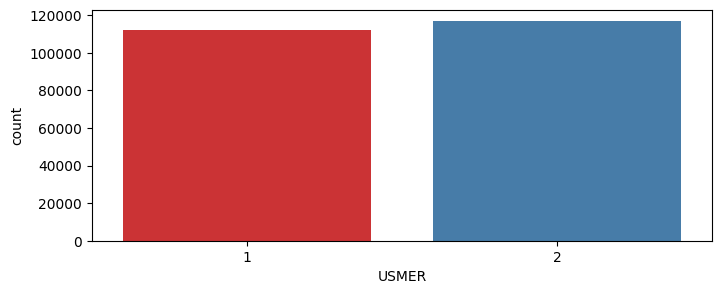

In [473]:
#usmr: Indicates whether the patient treated medical units of the first, second or third level.
plt.figure(figsize=(8,3))
sns.countplot(x=df['USMER'])
plt.show()

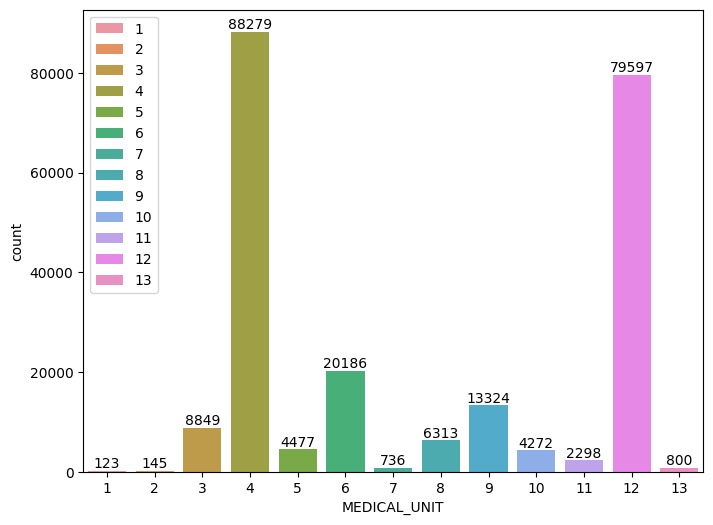

In [474]:
#medical unit: type of institution of the National Health System that provided the care.
plt.figure(figsize=(8,6))
ax=sns.countplot(x=df['MEDICAL_UNIT'],label=[1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.legend(loc='best')
ax.bar_label(ax.containers[0])
plt.show()

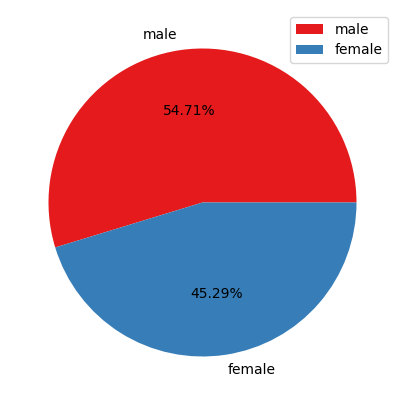

In [475]:
#sex: 1 for female and 2 for male.
plt.figure(figsize=(5,5))
sns.set_palette("Set1")
X=df['SEX'].value_counts()
plt.pie(x=X.values,labels=X.index,autopct='%.2f%%')
plt.legend()
plt.show()

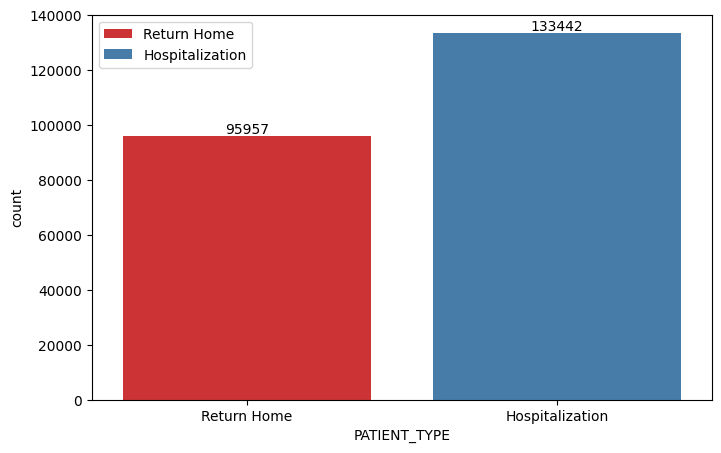

In [476]:
#patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df['PATIENT_TYPE'],label=['Return Home','Hospitalization'])
ax.bar_label(ax.containers[0])
plt.legend()
plt.show()

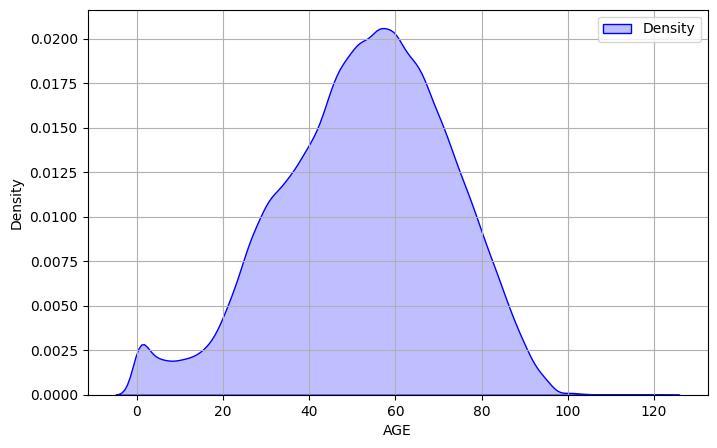

In [477]:
#age: of the patient.
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['AGE'],color='b',shade=True,label='Density')
plt.grid()
plt.legend()
plt.show()

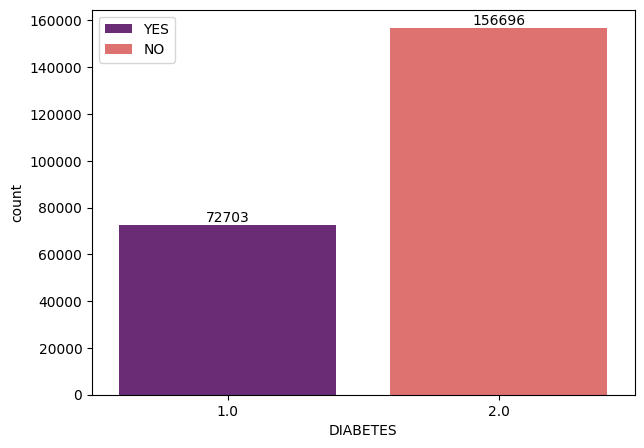

In [478]:
#diabetes: whether the patient has diabetes or not.
plt.figure(figsize=(7,5))
ax=sns.countplot(x=df['DIABETES'],label=['YES','NO'],palette='magma')
ax.bar_label(ax.containers[0])
plt.legend()
plt.show()

2.0    215566
1.0     13833
Name: COPD, dtype: int64


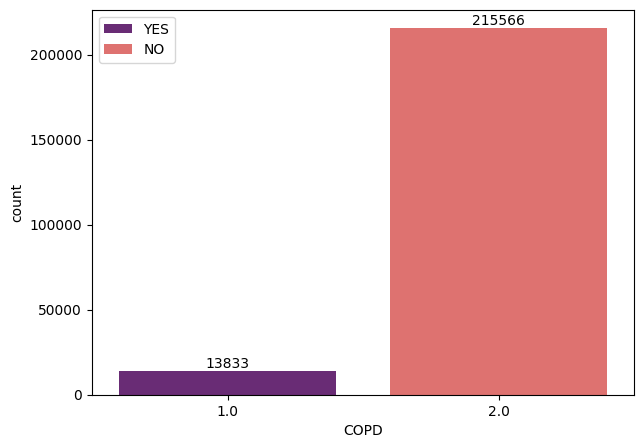

In [479]:
#copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
plt.figure(figsize=(7,5))
print(df['COPD'].value_counts())
ax=sns.countplot(x=df['COPD'],label=['YES','NO'],palette='magma')
ax.bar_label(ax.containers[0])
plt.legend()
plt.show()

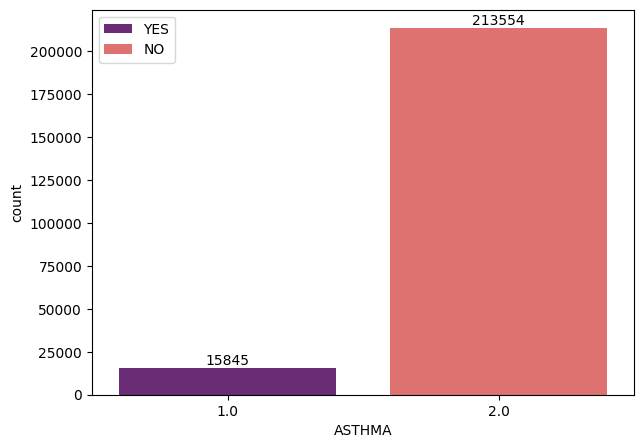

In [480]:
#asthma: whether the patient has asthma or not.
plt.figure(figsize=(7,5))
ax=sns.countplot(x=df['ASTHMA'],label=['YES','NO'],palette='magma')
ax.bar_label(ax.containers[0])
plt.legend()
plt.show()

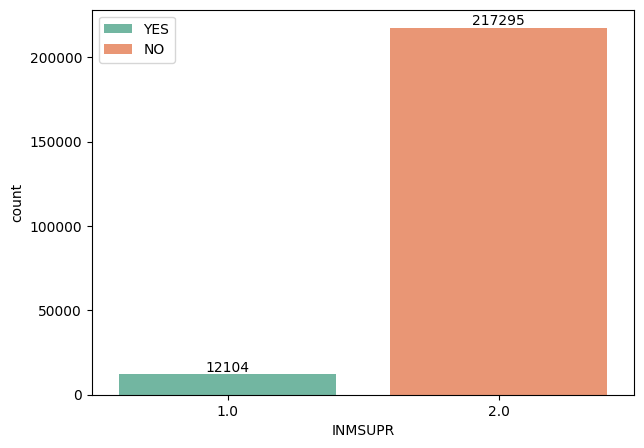

In [481]:
#inmsupr: whether the patient is immunosuppressed or not.
plt.figure(figsize=(7,5))
ax=sns.countplot(x=df['INMSUPR'],label=['YES','NO'],palette='Set2')
ax.bar_label(ax.containers[0])
plt.legend()
plt.show()

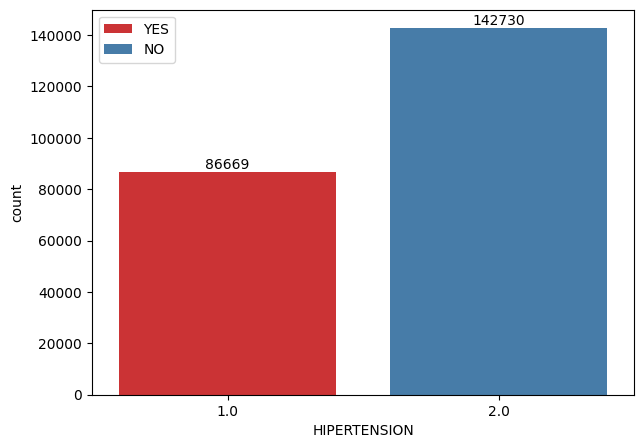

In [482]:
#hypertension: whether the patient has hypertension or not.
plt.figure(figsize=(7,5))
ax=sns.countplot(x=df['HIPERTENSION'],label=['YES','NO'],palette='Set1')
ax.bar_label(ax.containers[0])
plt.legend()
plt.show()

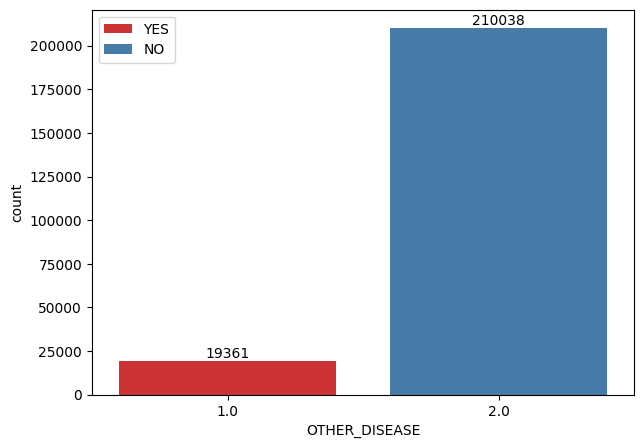

In [483]:
#other disease: whether the patient has other disease or not.
plt.figure(figsize=(7,5))
ax=sns.countplot(x=df['OTHER_DISEASE'],label=['YES','NO'],palette='Set1')
ax.bar_label(ax.containers[0])
plt.legend()
plt.show()

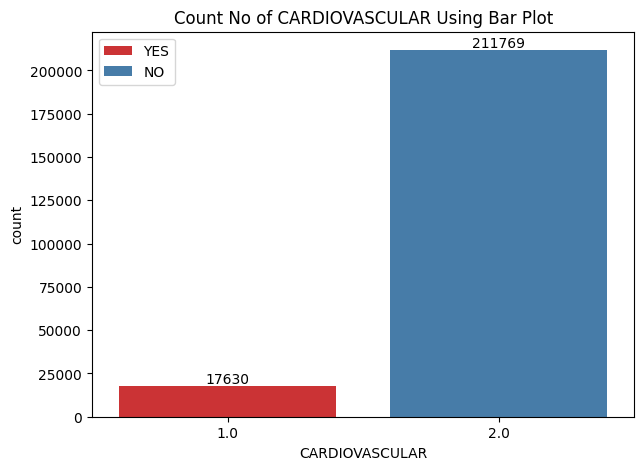

In [484]:
#cardiovascular: whether the patient has heart or blood vessels related disease.
plt.figure(figsize=(7,5))
ax=sns.countplot(x=df['CARDIOVASCULAR'],label=['YES','NO'],palette='Set1')
plt.title('Count No of CARDIOVASCULAR Using Bar Plot')
ax.bar_label(ax.containers[0])
plt.legend()
plt.show()

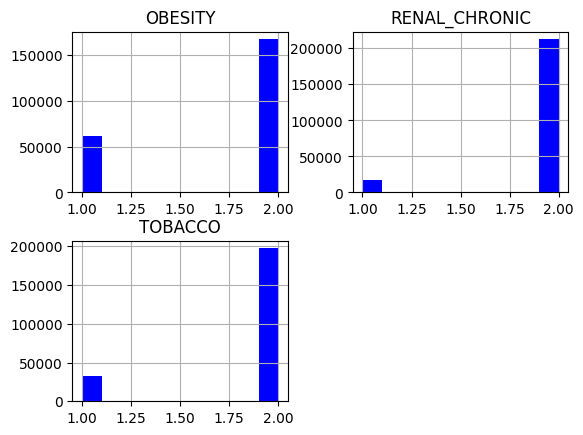

In [485]:
x=df[['OBESITY','RENAL_CHRONIC','TOBACCO']]
x.hist(color='b')
plt.legend()

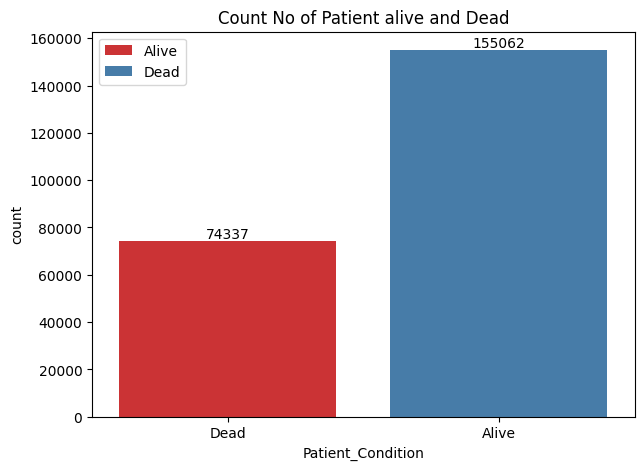

In [486]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x=df['Patient_Condition'],label=['Alive','Dead'],palette='Set1')
ax.bar_label(ax.containers[0])
plt.title('Count No of Patient alive and Dead')
plt.legend()
plt.show()

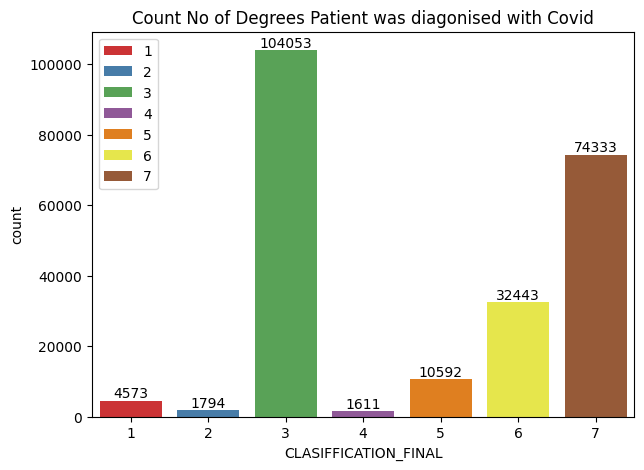

In [487]:
#classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
plt.figure(figsize=(7,5))
ax=sns.countplot(x=df['CLASIFFICATION_FINAL'],label=[1,2,3,4,5,6,7],palette='Set1')
ax.bar_label(ax.containers[0])
plt.title('Count No of Degrees Patient was diagonised with Covid')
plt.legend()
plt.show()

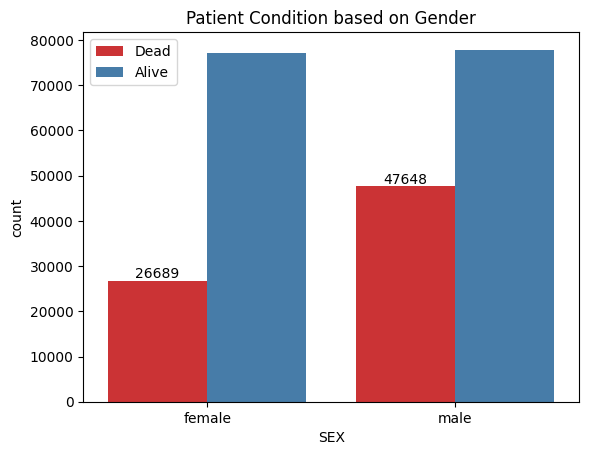

In [488]:
ax=sns.countplot(data=df,x='SEX',hue='Patient_Condition')
ax.bar_label(ax.containers[0])
plt.title('Patient Condition based on Gender')
plt.legend()
plt.show()

<Axes: >

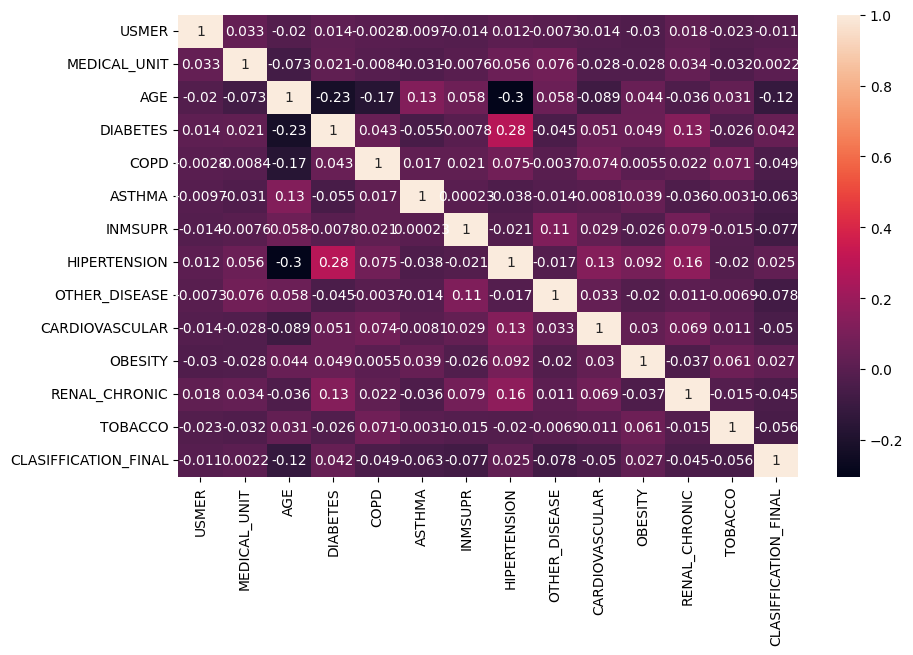

In [489]:
plt.figure(figsize=(10,6))
correlation=df.corr()
sns.heatmap(correlation,annot=True)

###We take a sample from original dataset which contains Date_Deid and Patient_Condition	columns and we convert Date_Deid column to datetime format and extract to day,month and year columns.

In [490]:
df_sample['DATE_DIED'].replace('9999-99-99',np.nan,inplace=True)
df_sample.dropna(axis=0,how='any',inplace=True)
df_sample['DATE_DIED']=pd.to_datetime(df_sample['DATE_DIED'])

In [491]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74337 entries, 0 to 1047639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE_DIED          74337 non-null  datetime64[ns]
 1   Patient_Condition  74337 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ MB


In [492]:
df_sample['year']=df_sample['DATE_DIED'].dt.year
df_sample['month']=df_sample['DATE_DIED'].dt.month
df_sample['day']=df_sample['DATE_DIED'].dt.day

In [493]:
df_sample.head()

,DATE_DIED,Patient_Condition,year,month,day
0,2020-03-05,Dead,2020,3,5
1,2020-03-06,Dead,2020,3,6
2,2020-09-06,Dead,2020,9,6
3,2020-12-06,Dead,2020,12,6
4,2020-06-21,Dead,2020,6,21


###Lets try some EDA for this df_sample dataset

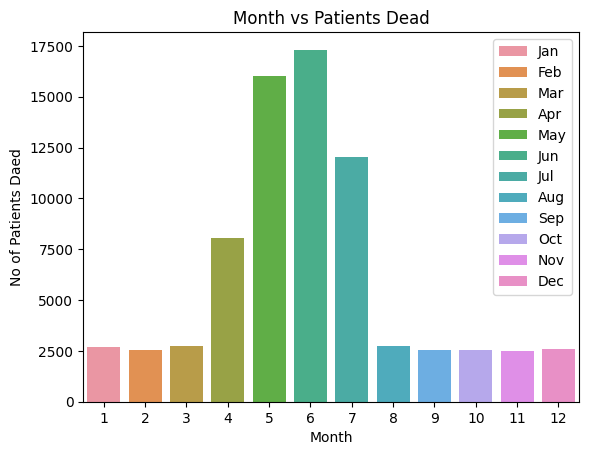

In [494]:
x=df_sample['month'].value_counts()
sns.barplot(x=x.index,y=x.values,label=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Month vs Patients Dead')
plt.xlabel('Month')
plt.ylabel('No of Patients Daed')
plt.legend()

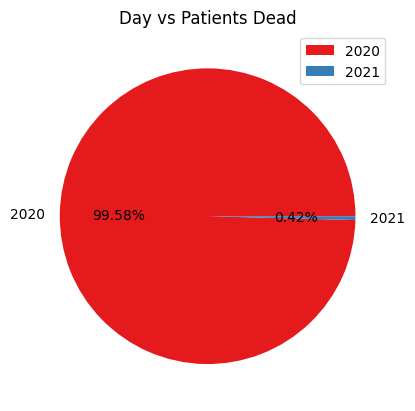

In [495]:
x=df_sample['year'].value_counts()
plt.pie(x=x.values,labels=x.index,autopct='%.2f%%')
plt.title('Day vs Patients Dead')
plt.legend()

###Final Conclusion-

1.From this dataset we can say that patient dead in Year 2020((99.58%) is more than Year 2021(0.42%).

2.Most of the patients are dead in the month of Jun.

3.40 to 80 age peoples are admitted for covid treatment  